<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula3_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X, y = dataset.data, dataset.target
X.shape, y.shape

((569, 30), (569,))

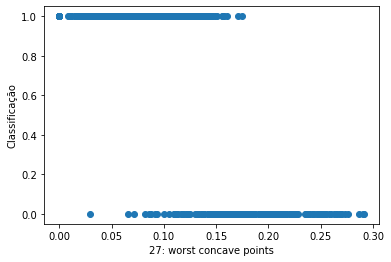

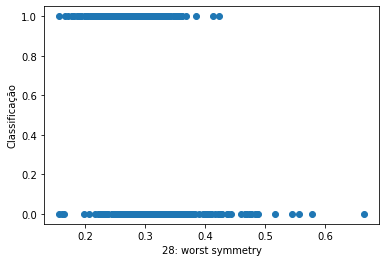

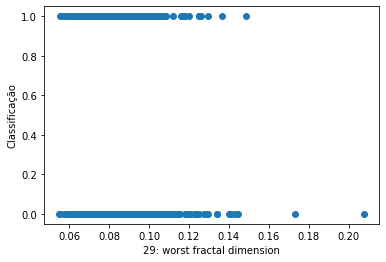

In [ ]:
import matplotlib.pyplot as plt
for i in range(27,X.shape[1]):
  plt.xlabel(f"{i}: {dataset.feature_names[i]}")
  plt.ylabel("Classificação")
  plt.scatter(X[:,i],y)
  plt.show()

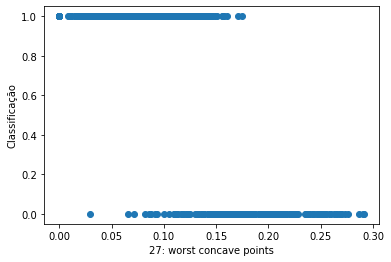

In [ ]:
X27 = X[:,27:28]
plt.xlabel(f"{27}: {dataset.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27,y)
plt.show()

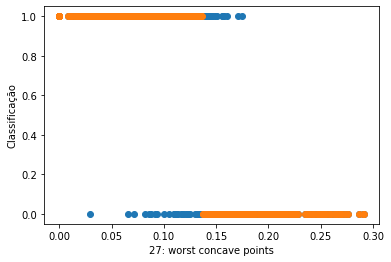

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class ClassificadorLinear():
  def __init__(self) -> None:
    self.lrmodel = LinearRegression()
  def fit(self, X, y):
    self.lrmodel.fit(X, y)
  def predict(self, X):
    ypred = self.lrmodel.predict(X)
    ypred = (ypred>0.5).astype(int)
    return ypred

modelo = ClassificadorLinear()
modelo.fit(X27,y)
ypred = modelo.predict(X27)

plt.xlabel(f"{27}: {dataset.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27,y)
plt.scatter(X27,ypred)
plt.show()

In [ ]:
mean_squared_error(y, ypred)

0.08787346221441125

In [ ]:
acurácia = sum(y==ypred)/len(y)
acurácia

0.9121265377855887

In [ ]:
1-acurácia, mean_squared_error(y, ypred)

(0.08787346221441128, 0.08787346221441125)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, ypred)

0.9121265377855887

In [ ]:
modelo.fit(X, y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)

0.9648506151142355

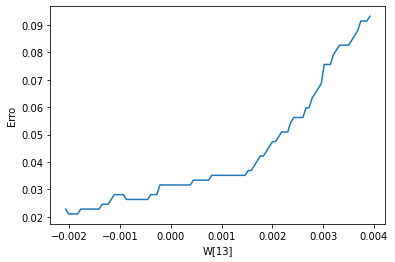

In [ ]:
import numpy as np

def plot(i, delta):
  erros = []
  coef = modelo.lrmodel.coef_[i]
  ws = np.linspace(coef-delta,coef+delta,101)
  for w in ws:
    modelo.lrmodel.coef_[i] = w
    ypred = modelo.predict(X)
    erro = mean_squared_error(y, ypred)
    erros.append(erro)
  modelo.lrmodel.coef_[i] = coef
  plt.ylabel("Erro")
  plt.xlabel(f"W[{i}]")
  plt.plot(ws, erros)
  plt.show()

plot(13, 0.003)

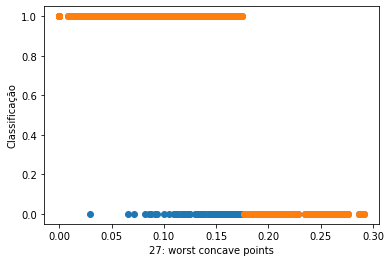

0.836555360281195

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X27,y)
ypred = modelo.predict(X27)

plt.xlabel(f"{27}: {dataset.feature_names[27]}")
plt.ylabel("Classificação")
plt.scatter(X27,y)
plt.scatter(X27,ypred)
plt.show()
accuracy_score(y, ypred)

In [ ]:
modelo = LogisticRegression(solver="liblinear")
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)

0.9595782073813708

In [ ]:
from sklearn.linear_model import SGDClassifier

modelo = SGDClassifier("log")
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)

0.9209138840070299

In [ ]:
from sklearn.linear_model import RidgeClassifier

modelo = RidgeClassifier()
modelo.fit(X,y)
ypred = modelo.predict(X)
accuracy_score(y, ypred)

0.9595782073813708

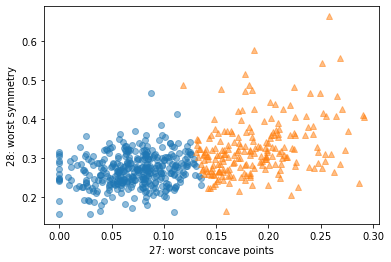

0.9121265377855887

In [ ]:
modelo = SGDClassifier()
modelo.fit(X[:,27:29],y)
ypred = modelo.predict(X[:,27:29])

plt.xlabel(f"{27}: {dataset.feature_names[27]}")
plt.ylabel(f"{28}: {dataset.feature_names[28]}")


# plt.plot(X[:,27][y==1], X[:,28][y==1], "o", alpha=0.5)
# plt.plot(X[:,27][y==0], X[:,28][y==0], "^", alpha=0.5)

plt.plot(X[:,27][ypred==1], X[:,28][ypred==1], "o", alpha=0.5)
plt.plot(X[:,27][ypred==0], X[:,28][ypred==0], "^", alpha=0.5)

plt.show()
accuracy_score(y, ypred)

In [ ]:
modelo.coef_, modelo.intercept_

(array([[-34.92110596,  -3.32460612]]), array([5.88154816]))